In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_excel(r"/Dry_Bean_Dataset.xlsx")
#type(data)  #Data frame    
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
data.notnull().count()

Area               13611
Perimeter          13611
MajorAxisLength    13611
MinorAxisLength    13611
AspectRation       13611
Eccentricity       13611
ConvexArea         13611
EquivDiameter      13611
Extent             13611
Solidity           13611
roundness          13611
Compactness        13611
ShapeFactor1       13611
ShapeFactor2       13611
ShapeFactor3       13611
ShapeFactor4       13611
Class              13611
dtype: int64

Above values shows that there is no missing values in our Dataset


<Axes: xlabel='Class', ylabel='Count'>

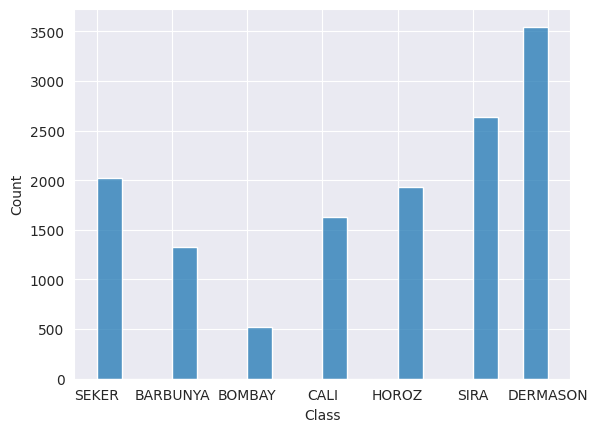

In [ ]:
sns.set_style("darkgrid")

sns.histplot(data=data,  x="Class", discrete=False)


Box Plot

[Text(0, 0.5, 'Bean Type')]

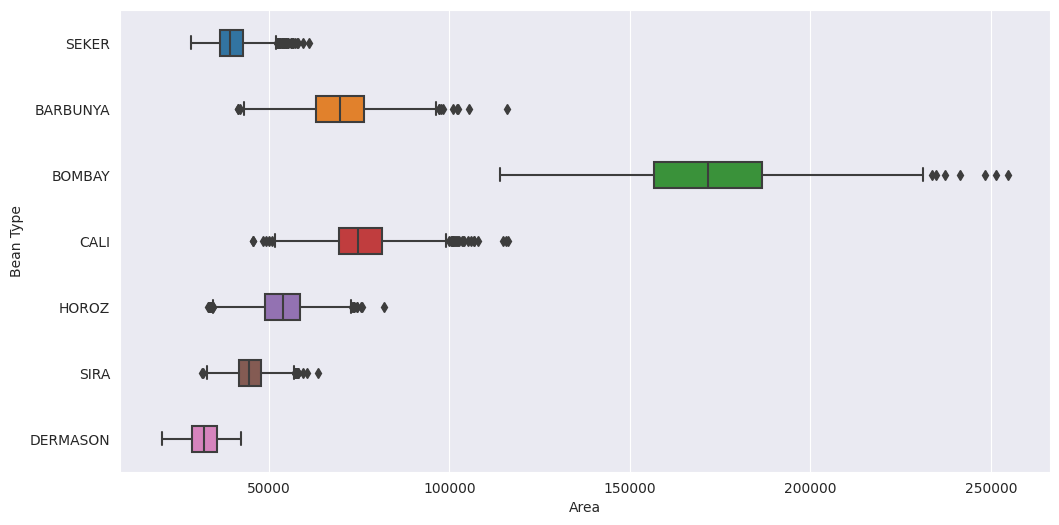

In [ ]:
# Displaying Boxplot

f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Area", y="Class", data=data, width=.4)
ax.xaxis.grid(True)
ax.set(ylabel="Bean Type")

<ipython-input-8-6244cc5aca68>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


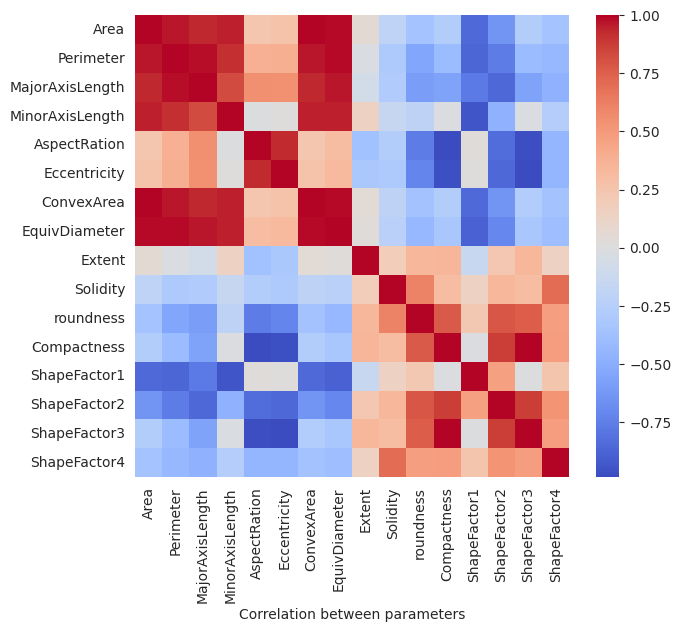

In [ ]:
# Displaying Heatmap


f, ax = plt.subplots(figsize=(7, 6))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm')
ax.set(xlabel="Correlation between parameters")
f.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def split_features_label(data):
  features = pd.DataFrame(data, columns=data.columns[0:-1]) #Features obtained Dataframe, except the class
  labels = data[data.columns[-1]].to_frame()                #Label obtained from last column
  return features, labels




In [ ]:
feat, labels = split_features_label(data)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


# Performing scalar transform
scaler = StandardScaler()
scaler.fit(feat)
scaled_features = scaler.transform(feat)

scaled_features = pd.DataFrame(data=scaled_features )
scaled_features.columns =  feat.columns
scaled_data  = pd.concat([scaled_features, labels], axis=1)
scaled_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261425,0.055630,-0.006086,0.760813,DERMASON
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110384,0.285117,0.328393,0.722659,DERMASON
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104269,0.289204,0.336328,0.390251,DERMASON
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141906,0.228375,0.248973,0.036440,DERMASON


Creation of Test and Train data

In [ ]:
df_train, df_test   = train_test_split(scaled_data ,test_size=0.2, shuffle=True, random_state=5)



Creation of Train and validation data for model hyperparamter optimization

In [ ]:
train_data, validation_data =   train_test_split(df_train ,test_size=0.1, shuffle=True, random_state=5)
x_tr, y_tr =  split_features_label(train_data)
x_val, y_val = split_features_label(validation_data)


**Support Vector Machine**

Optimization for C parameter (regularization)

In [ ]:
from sklearn.svm import SVC

performance = []
reg_param = np.linspace(0.01, 1, num=100)

for c in reg_param:
  c_val_measure = ()
  model_svc = SVC(C=float(c), gamma='scale',
                  coef0=0.0, shrinking=False,
                  tol=0.001, class_weight=None,
                  verbose=False, max_iter=-1, decision_function_shape='ovo',
                  break_ties=False, random_state= 5)
  
  model_svc.fit(x_tr, np.array(y_tr).ravel())
  model_predict = model_svc.predict(x_val)
  acc = accuracy_score(y_val, model_predict)
  c_val_measure = (c,acc)
  performance.append(c_val_measure)  








 The best C value with highest accuracy : 0.8200000000000001


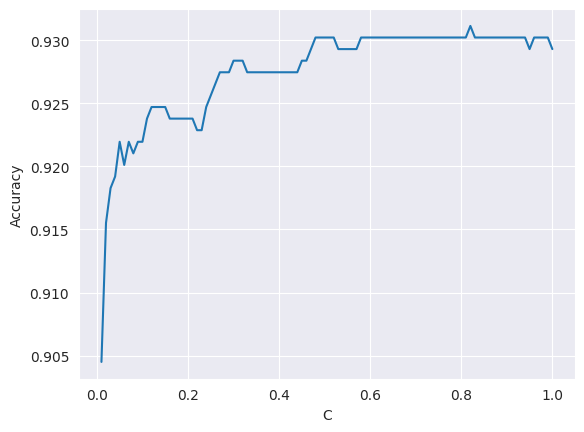

In [ ]:
acc_vc_c=pd.DataFrame(data=performance)
acc_vc_c.columns = ["C","Accuracy"]
sns.lineplot(data=acc_vc_c,x="C", y="Accuracy",)

C_value =  acc_vc_c[acc_vc_c["Accuracy"] == max(acc_vc_c['Accuracy'])] 
C_value = float(C_value["C"]) 
print('\n The best C value with highest accuracy : ' + str(C_value))



Optimization for kernal

In [ ]:
from sklearn.svm import SVC

lst_kernal = ["linear", "poly", "rbf", "sigmoid"]
kernal_performance = []
for kr in lst_kernal:
  kernal_measure = ()
  model_svc = SVC(C=C_value, kernel = kr, gamma='scale',
                  coef0=0.0, shrinking=False,
                  tol=0.001, class_weight=None,
                  verbose=False, max_iter=-1, decision_function_shape='ovo',
                  break_ties=False, random_state= 5)
  
  model_svc.fit(x_tr, np.array(y_tr).ravel())
  model_predict = model_svc.predict(x_val)
  acc = accuracy_score(y_val, model_predict)
  kernal_measure = (kr, acc)
  kernal_performance.append(kernal_measure)  


 The best kernal with highest accuracy : rbf


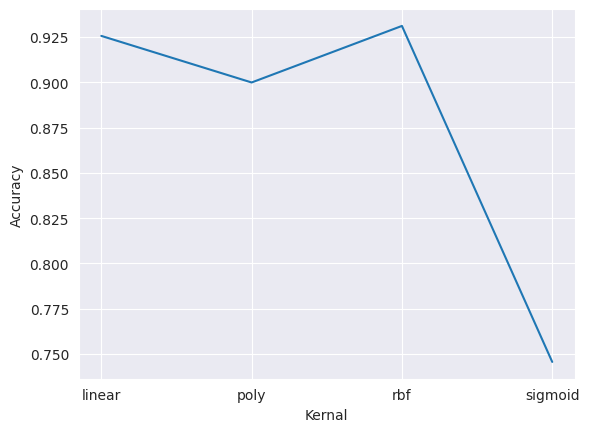

In [ ]:
acc_vc_kr = pd.DataFrame(data=kernal_performance)
acc_vc_kr.columns = ["Kernal","Accuracy"]
sns.lineplot( data = acc_vc_kr ,x="Kernal", y="Accuracy",)



Kernal_value =  acc_vc_kr[acc_vc_kr["Accuracy"] == max(acc_vc_kr['Accuracy'])] 
Kernal_value = Kernal_value["Kernal"]

Kernal_value = str(Kernal_value).split()[1]

print('\n The best kernal with highest accuracy : ' + str(Kernal_value))



Creating SVM with optimized Hyperparamters



In [ ]:
x_train, y_train = split_features_label(df_train)

best_model_svc = SVC(C= C_value, kernel = Kernal_value, gamma='scale',
                  coef0=0.0, shrinking=False,
                  tol=0.001, class_weight=None,
                  verbose=False, max_iter=-1, decision_function_shape='ovo',
                  break_ties=False, random_state= 5)
  
best_model_svc.fit(x_train, np.array(y_train).ravel())

SVC(C=0.8200000000000001, decision_function_shape='ovo', random_state=5,
    shrinking=False)

Test results for test Data

In [ ]:
x_test, y_test =   split_features_label(df_test)
test_pred = best_model_svc.predict(x_test)


In [ ]:
test_pred

array(['BARBUNYA', 'DERMASON', 'SEKER', ..., 'BARBUNYA', 'DERMASON',
       'SEKER'], dtype=object)

In [ ]:
Final_test_result = pd.DataFrame({
    'Test ID': y_test.index,
    'Predicted Label': np.array(test_pred),
    'Actual Label': np.array(y_test["Class"])
})

Final_test_result.to_csv('SVM_Predictions.csv', index=False)


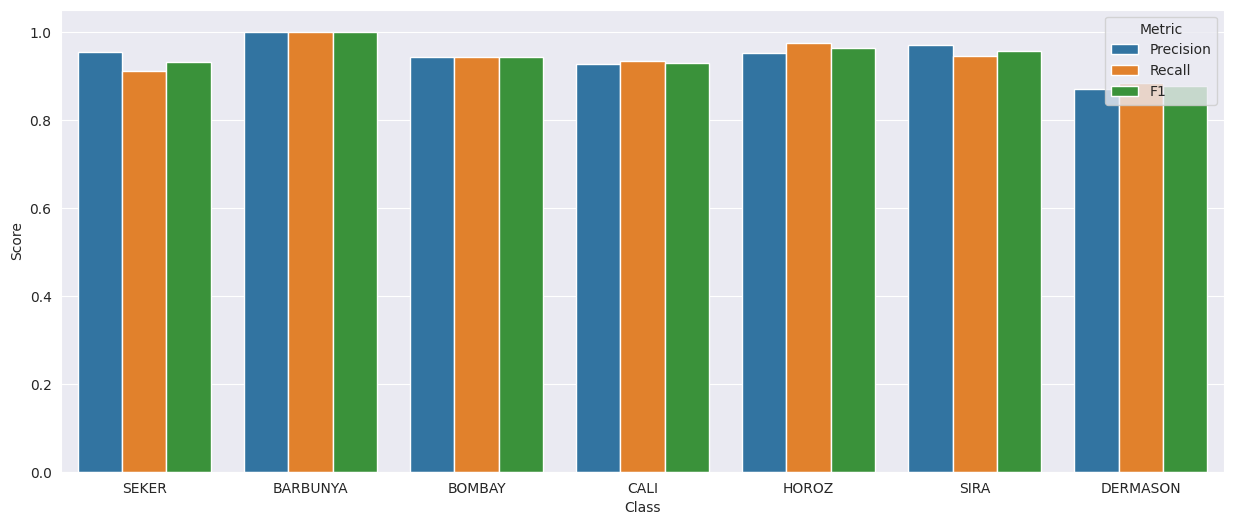

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score



prec = precision_score(y_test, test_pred , average=None)
rec = recall_score(y_test, test_pred , average=None)
f1 = f1_score(y_test, test_pred , average=None)

metric_results = {
        "Class": labels["Class"].unique(),
        "Precision": prec,
        "Recall": rec,
        "F1": f1
        }

df_metric_results = pd.DataFrame(metric_results)


df_metric_results = df_metric_results.melt(id_vars=["Class"], var_name="Metric", value_name="Score")

plt.figure(figsize=(15, 6))

sns.barplot(data=df_metric_results, x="Class", y="Score", hue="Metric")


# Add legend and axis labels
plt.legend(title="Metric")
plt.xlabel("Class")
plt.ylabel("Score")


plt.show()



In [ ]:
pd.DataFrame(data=metric_results)

,Class,Precision,Recall,F1
0,SEKER,0.952790,0.909836,0.930818
1,BARBUNYA,1.000000,1.000000,1.000000
2,BOMBAY,0.942529,0.942529,0.942529
3,CALI,0.926330,0.932692,0.929500
4,HOROZ,0.952000,0.975410,0.963563
5,SIRA,0.968900,0.944056,0.956316
6,DERMASON,0.869903,0.883629,0.876712


In [ ]:
prec_overall = precision_score(y_test, test_pred , average='macro')
rec_overall = recall_score(y_test, test_pred , average='macro')
f1_overall = f1_score(y_test, test_pred , average='macro')

print(f"The overall Precision is {prec_overall}")
print(f"The overall Recall is {rec_overall}")
print(f"The overall F1 Score is {f1_overall}")



The overall Precision is 0.9446358599176675
The overall Recall is 0.9411645829058971
The overall F1 Score is 0.9427768829416932


The overall accuracy is 0.9327947117150202 %


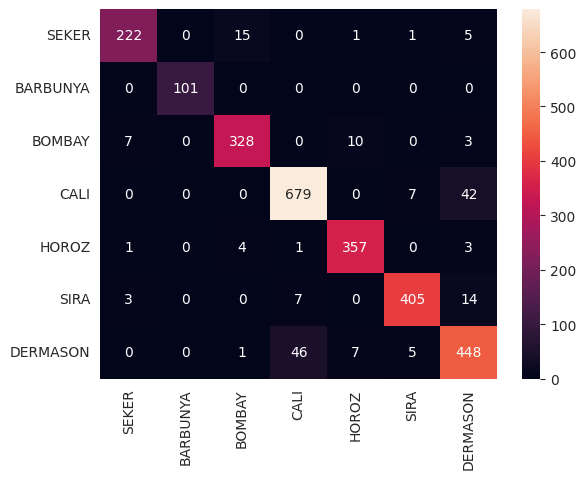

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc = accuracy_score(y_test, test_pred)

print(f'The overall accuracy is {acc} %')

confusion_matrix = confusion_matrix(y_test, test_pred)
disp = sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels =labels["Class"].unique(), yticklabels=labels["Class"].unique() )

disp.plot()
plt.show()


Multi Layer Perceptron

In [ ]:
from sklearn.model_selection import KFold

# Split data into Features and label
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Define k folds
kfold = KFold(n_splits=5, shuffle=True, random_state=5)

In [ ]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(data = X)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create y in a form of 2D array
ohe = OneHotEncoder()
y = ohe.fit_transform(y.values.reshape(-1, 1)).toarray()
y = pd.DataFrame(data = y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

# Define the model architecture
mlp_model = Sequential()
mlp_model.add(Dense(16, activation='relu', input_dim=X.shape[1]))
mlp_model.add(BatchNormalization())

mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(BatchNormalization())

mlp_model.add(Dense(16, activation='relu'))
mlp_model.add(BatchNormalization())

mlp_model.add(Dense(7, activation='sigmoid'))

# Compile the model
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_scores = []
recall_scores = []
f1_scores = []
mlp_accuracies = []

for train_idx, test_idx in kfold.split(X):
    
    # Making the test and train data for k fold
    X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


    mlp_model.fit(X_train, y_train, epochs=10)
    
    # Predicted values of test set
    y_pred = mlp_model.predict(X_test)

    # Transforming the predicted values into array
    y_pred_array = ohe.inverse_transform(y_pred)

    # Transforming the actual values into array
    y_test_array = ohe.inverse_transform(y_test)

    # Getting the evaluation scores against test set
    precision = precision_score(y_test_array, y_pred_array, average='macro')
    recall = recall_score(y_test_array, y_pred_array, average='macro')
    f1 = f1_score(y_test_array, y_pred_array, average='macro')
    mlp_accuracy = accuracy_score(y_test_array, y_pred_array)
    
    # Appending the results in array
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    mlp_accuracies.append(mlp_accuracy)






Epoch 1/10
341/341 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9266
Epoch 2/10
341/341 [==============================] - 1s 3ms/step - loss: 0.0552 - accuracy: 0.9251
Epoch 3/10
341/341 [==============================] - 1s 3ms/step - loss: 0.0553 - accuracy: 0.9263
Epoch 4/10
341/341 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9260
Epoch 5/10
341/341 [==============================] - 1s 4ms/step - loss: 0.0550 - accuracy: 0.9253
Epoch 6/10
341/341 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9279
Epoch 7/10
341/341 [==============================] - 1s 4ms/step - loss: 0.0538 - accuracy: 0.9293
Epoch 8/10
341/341 [==============================] - 1s 3ms/step - loss: 0.0551 - accuracy: 0.9246
Epoch 9/10
341/341 [==============================] - 1s 4ms/step - loss: 0.0546 - accuracy: 0.9250
Epoch 10/10
86/86 [==============================] - 0s 2ms/step
Epoch 1/10
341/341 [===============

In [ ]:
    # Getting mean precision, mean recall, and mean F1 score and mean accuracy for overall result

    mean_mlp_precision = np.mean(precision_scores)
    mean_mlp_recall = np.mean(recall_scores)
    mean_mlp_f1 = np.mean(f1_scores)
    mean_mlp_accuracy = np.mean(mlp_accuracies)
    
print(f"The overall Precision is {mean_mlp_precision}")
print(f"The overall Recall is {mean_mlp_recall}")
print(f"The overall F1 Score is {mean_mlp_f1}")
print(f'The overall accuracy is {mean_mlp_accuracy} %')


The overall Precision is 0.9444563135497536
The overall Recall is 0.9410222664929133
The overall F1 Score is 0.9424039088598886
The overall accuracy is 0.9313052363961928 %


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix


metric_results = {
        "K fold": [1,2,3,4,5],
        "Precision": precision_scores,
        "Recall": recall_scores,
        "F1": f1_scores,
        "accuracy": mean_mlp_accuracy
        }

df_metric_results = pd.DataFrame(metric_results)
df_metric_results

,K fold,Precision,Recall,F1,accuracy
0,1,0.946580,0.942744,0.944415,0.931305
1,2,0.941637,0.938185,0.939169,0.931305
2,3,0.940747,0.935618,0.937936,0.931305
3,4,0.947095,0.944497,0.945613,0.931305
4,5,0.946223,0.944068,0.944886,0.931305


In [ ]:
predicted_y_list = [value[0] for value in y_pred_array ]
actual_y_list = [value[0] for value in y_test_array]



In [ ]:
Final_test_result_extra = pd.DataFrame({
    'Test ID': y_test.index,
    'Predicted Label': predicted_y_list,
    'Actual Label': actual_y_list
})
#Final_test_result_extra
Final_test_result_extra.to_csv('MLP_Predictions.csv', index=False)
